# Solving the maximum margin problem with quadratic programming (QP)

The best QP solver for Python is "cvxopt."

First, let's set up synthetic data with linear separability.

Let's try two 2D Gaussians that are well separated.

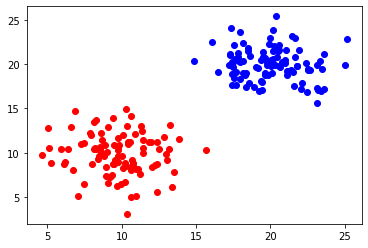

In [14]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

# Two 2D Gaussians

mu1 = np.array([10, 10])
mu2 = np.array([20, 20])
sigma = np.array([[4, 0], [0, 4]])

X1 = np.random.multivariate_normal(mu1, sigma, 100)
X2 = np.random.multivariate_normal(mu2, sigma, 100)

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.show()


In [15]:
# Combine the classes and set targets

X = np.concatenate((X1, X2), 0)
y = np.concatenate((-np.ones((100, 1)), np.ones((100, 1))), 0)
m = X.shape[0]
n = 2

# QP problem: set Q, c, A, b

# Parameters are w, b.

c = np.zeros((n+1, 1))
Q = np.eye(n+1)
Q[n,n] = 0
b = -np.ones((m, 1))
A = - np.concatenate((X, np.ones((m, 1))), 1) * y

def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

opt_params = cvxopt_solve_qp(Q, c, A, b)


     pcost       dcost       gap    pres   dres
 0:  8.3617e-03  3.6286e+01  5e+02  2e+00  2e+03
 1:  6.4506e-02 -5.3165e+01  6e+01  2e-01  3e+02
 2:  7.9737e-02 -1.7593e+00  2e+00  6e-03  8e+00
 3:  7.4556e-02  1.6571e-02  6e-02  7e-16  2e-15
 4:  5.2006e-02  3.4839e-02  2e-02  1e-15  3e-15
 5:  5.2432e-02  4.0578e-02  1e-02  6e-16  3e-15
 6:  5.1099e-02  5.0331e-02  8e-04  7e-16  2e-15
 7:  5.0920e-02  5.0912e-02  8e-06  6e-16  1e-15
 8:  5.0918e-02  5.0918e-02  8e-08  6e-16  6e-15
Optimal solution found.


In [11]:
opt_params

array([  0.37106013,   0.33214728, -10.75449171])

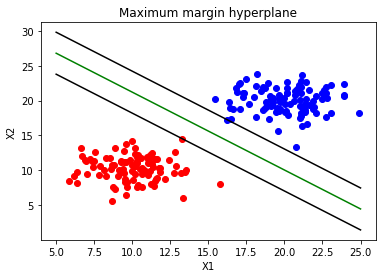

In [13]:
# Line is w^t x + b = 0
# w[0] x11 + w[1] x21 + b = 0
# x21 = (-w[0] x11 - b) / w[1]

w = opt_params[0:2]
b = opt_params[2]
x11 = 5
x12 = 25
x21 = (-w[0] * x11 - b) / w[1]
x22 = (-w[0] * x12 - b) / w[1]

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.plot((x11, x12), (x21, x22), 'g-')

# Blue margin line

x21 = (-w[0] * x11 - b + 1) / w[1]
x22 = (-w[0] * x12 - b + 1) / w[1]

plt.plot((x11, x12), (x21, x22), 'k-')

# Red margin line

x21 = (-w[0] * x11 - b - 1) / w[1]
x22 = (-w[0] * x12 - b - 1) / w[1]

plt.plot((x11, x12), (x21, x22), 'k-')

plt.title('Maximum margin hyperplane')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()